# News Category predction -- Hackthon Challenge 1

### FEATURES

<b>STORY:</b>  A part of the main content of the article to be published as a piece of news.<br>
<b>SECTION:</b> The genre/category the STORY falls in. There are four distinct sections where each story may fall in to. The Sections are labelled as follows :</li>
Politics: 0<br>
Technology: 1<br>
Entertainment: 2<br>
Business: 3

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


import pandas as pd
import numpy as np

# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.initializers import he_normal
from keras.regularizers import l2

In [6]:
!pip install openpyxl==3.0.9

     |████████████████████████████████| 242 kB 6.2 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


### Reading data

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [6]:
predict_data = pd.read_excel('/content/Data_Test.xlsx')

### Data analysis: train_data

In [7]:
print(train_data.head())
print(train_data.shape)

                                               STORY  SECTION
0  But the most painful was the huge reversal in ...      3.0
1  How formidable is the opposition alliance amon...      0.0
2  Most Asian currencies were trading lower today...      3.0
3  If you want to answer any question, click on ‘...      1.0
4  In global markets, gold prices edged up today ...      3.0
(7628, 2)


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STORY    7628 non-null   object 
 1   SECTION  7628 non-null   float64
dtypes: float64(1), object(1)
memory usage: 119.3+ KB


In [9]:
train_data['STORY'].describe()

count                                                  7628
unique                                                 7548
top       This story has been published from a wire agen...
freq                                                     28
Name: STORY, dtype: object

In [10]:
train_data['STORY'].isnull().sum()

0

In [11]:
train_data['SECTION'].describe()

count    7628.000000
mean        1.357892
std         0.999341
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: SECTION, dtype: float64

In [13]:
train_data['SECTION'].value_counts()

1.0    2772
2.0    1924
0.0    1686
3.0    1246
Name: SECTION, dtype: int64

In [12]:
#Checking whether there are any rows with null values
nan_rows = train_data[train_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [STORY, SECTION]
Index: []


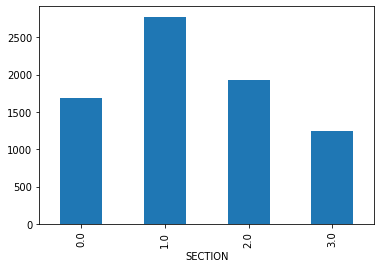

In [14]:
train_data.groupby("SECTION")['STORY'].count().plot.bar()

### Data analysis: Test data

In [15]:
predict_data.head()

STORY
0  2019 will see gadgets like gaming smartphones ...
1  It has also unleashed a wave of changes in the...
2  It can be confusing to pick the right smartpho...
3  The mobile application is integrated with a da...
4  We have rounded up some of the gadgets that sh...

In [16]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [17]:
predict_data['STORY'].describe()

count                                                  2748
unique                                                 2737
top       This story has been published from a wire agen...
freq                                                      6
Name: STORY, dtype: object

In [18]:
#Checking whether there are any rows with null values
nan_rows = predict_data[predict_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [STORY]
Index: []


## Getting stories separated according to the category they belong

In [19]:
politics_story = []
tech_story = []
entertainment_story = []
business_story = []

for i in range(0,len(train_data)):
    if(train_data['SECTION'][i]==0):
        politics_story.append(train_data['STORY'][i])
        
    if(train_data['SECTION'][i]==1):
        tech_story.append(train_data['STORY'][i])
        
    if(train_data['SECTION'][i]==2):
        entertainment_story.append(train_data['STORY'][i])
        
    if(train_data['SECTION'][i]==3):
        business_story.append(train_data['STORY'][i])

In [20]:
type(train_data['SECTION'][0])

numpy.float64

## Plotting WordCloud

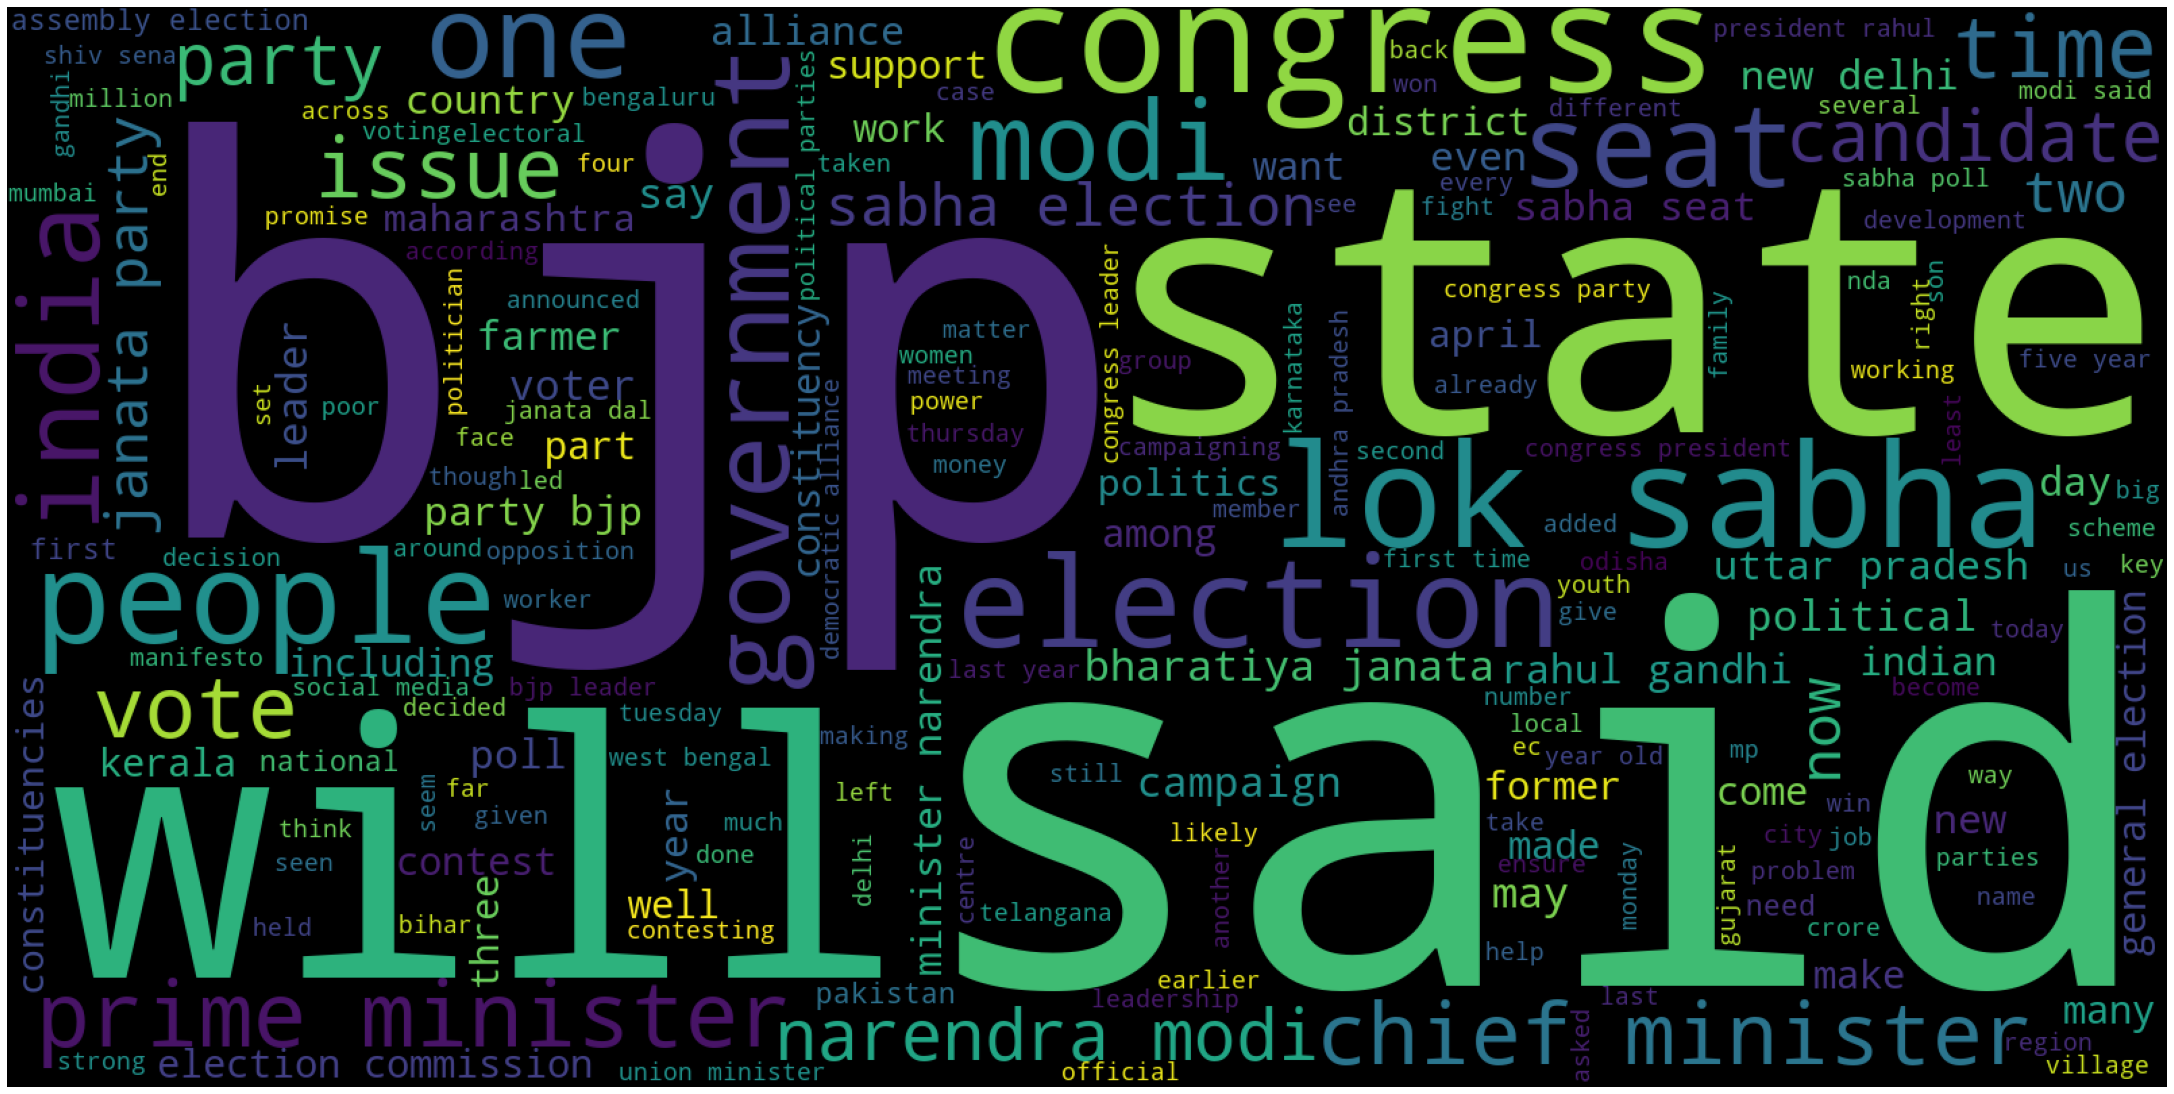

In [21]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in politics_story: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',
                          width=1600,
                          height=800,
                    ).generate(comment_words)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

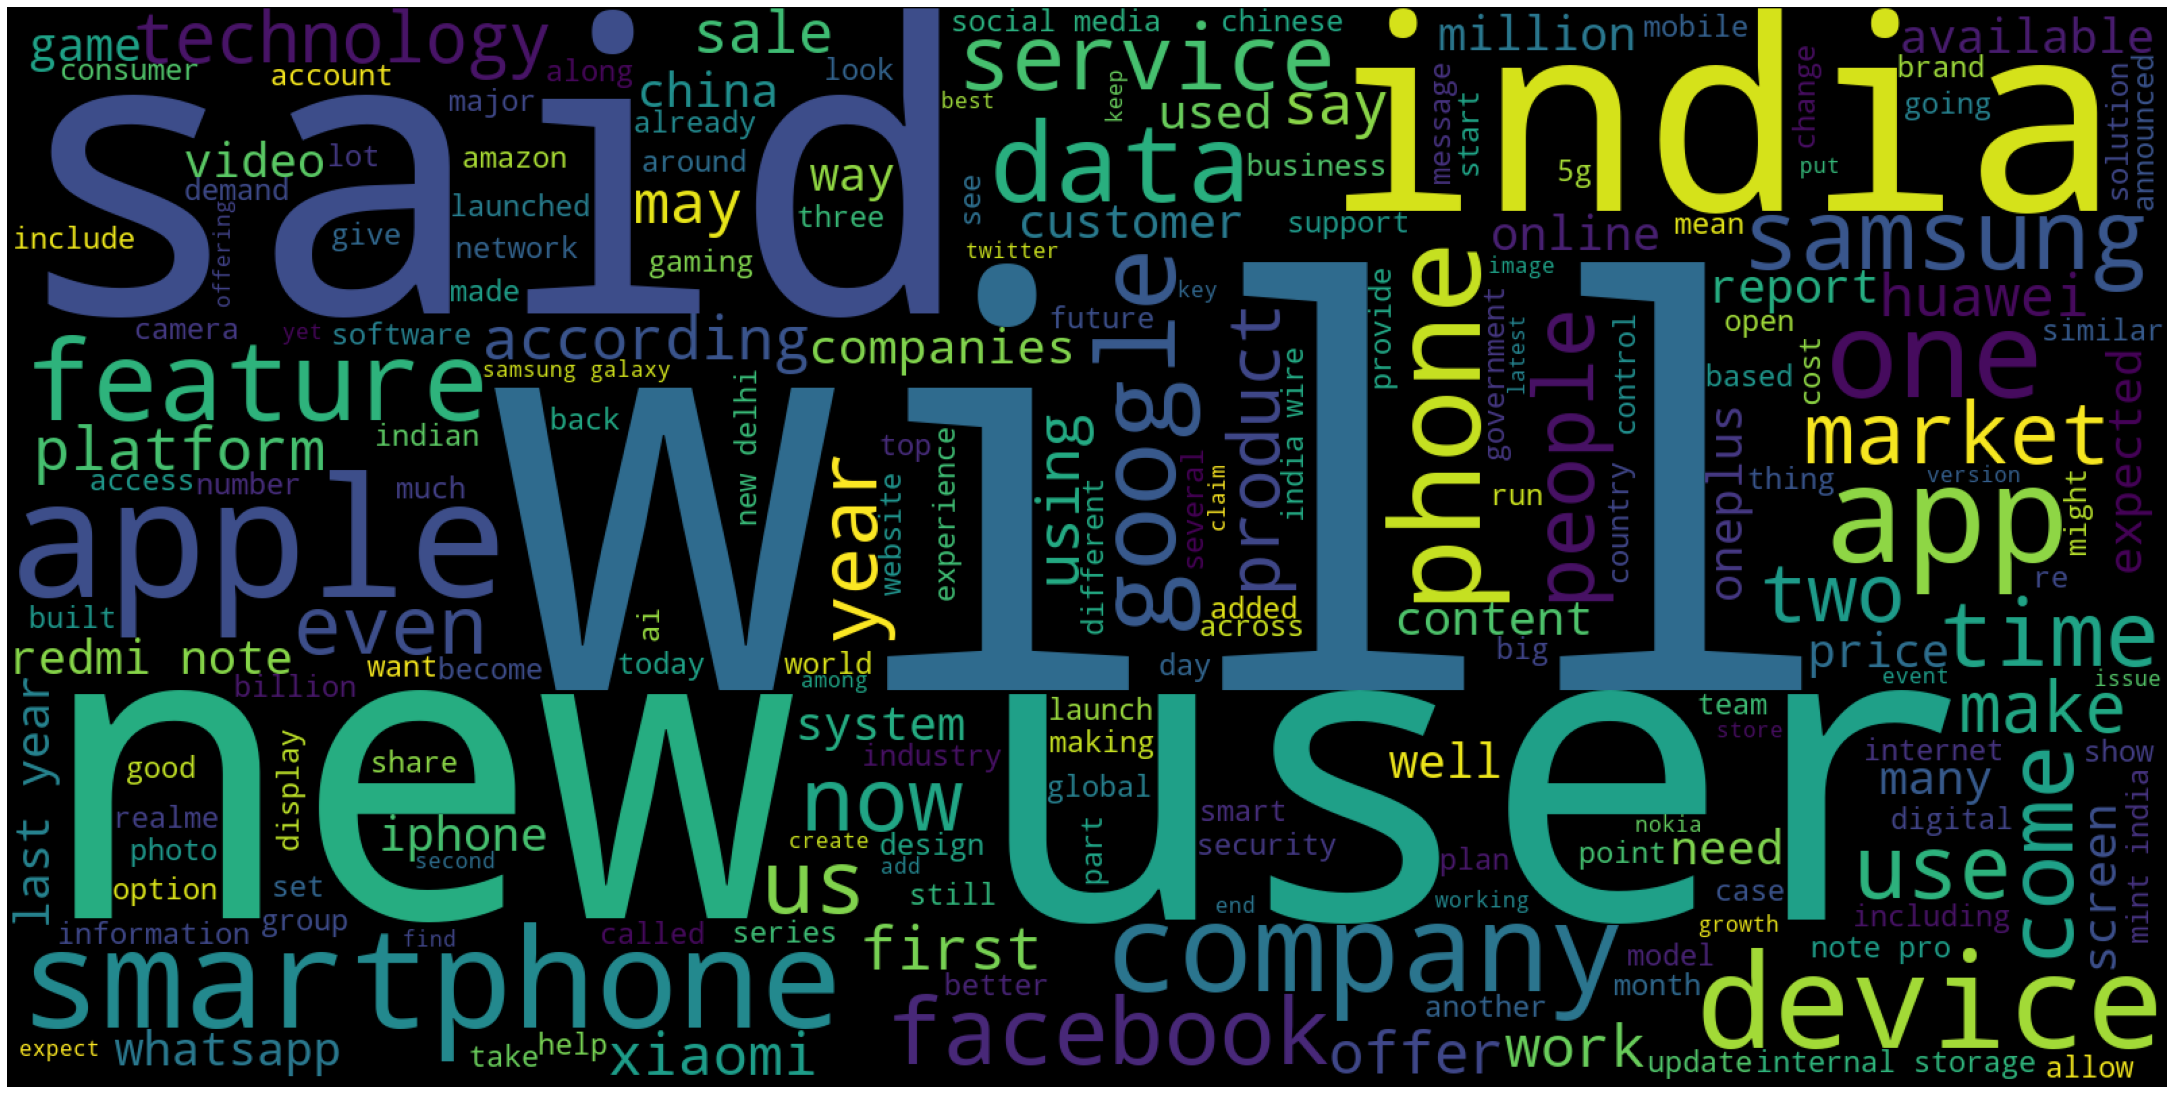

In [22]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in tech_story: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',
                          width=1600,
                          height=800,
                    ).generate(comment_words)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

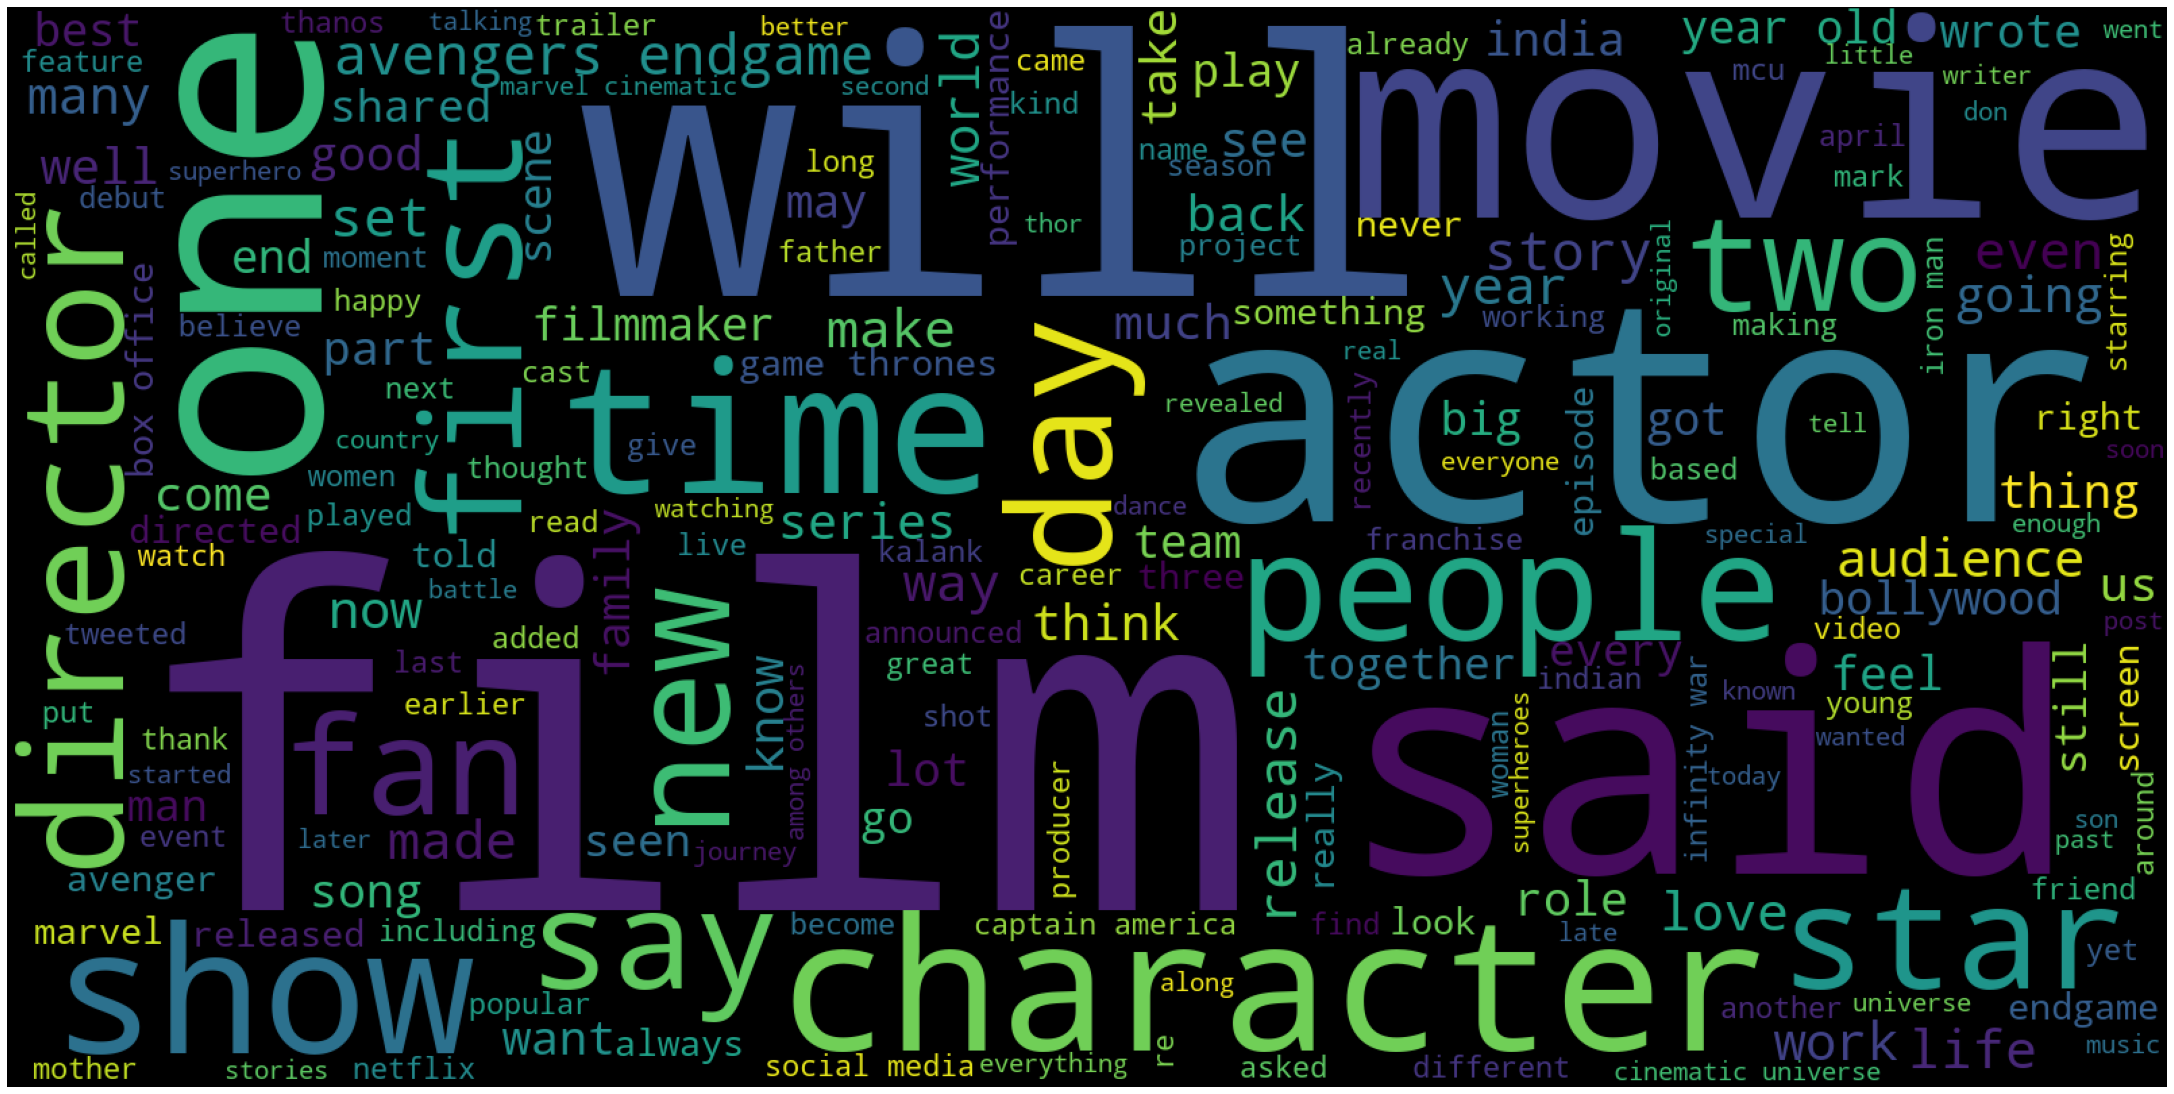

In [23]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in entertainment_story: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',
                          width=1600,
                          height=800,
                    ).generate(comment_words)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

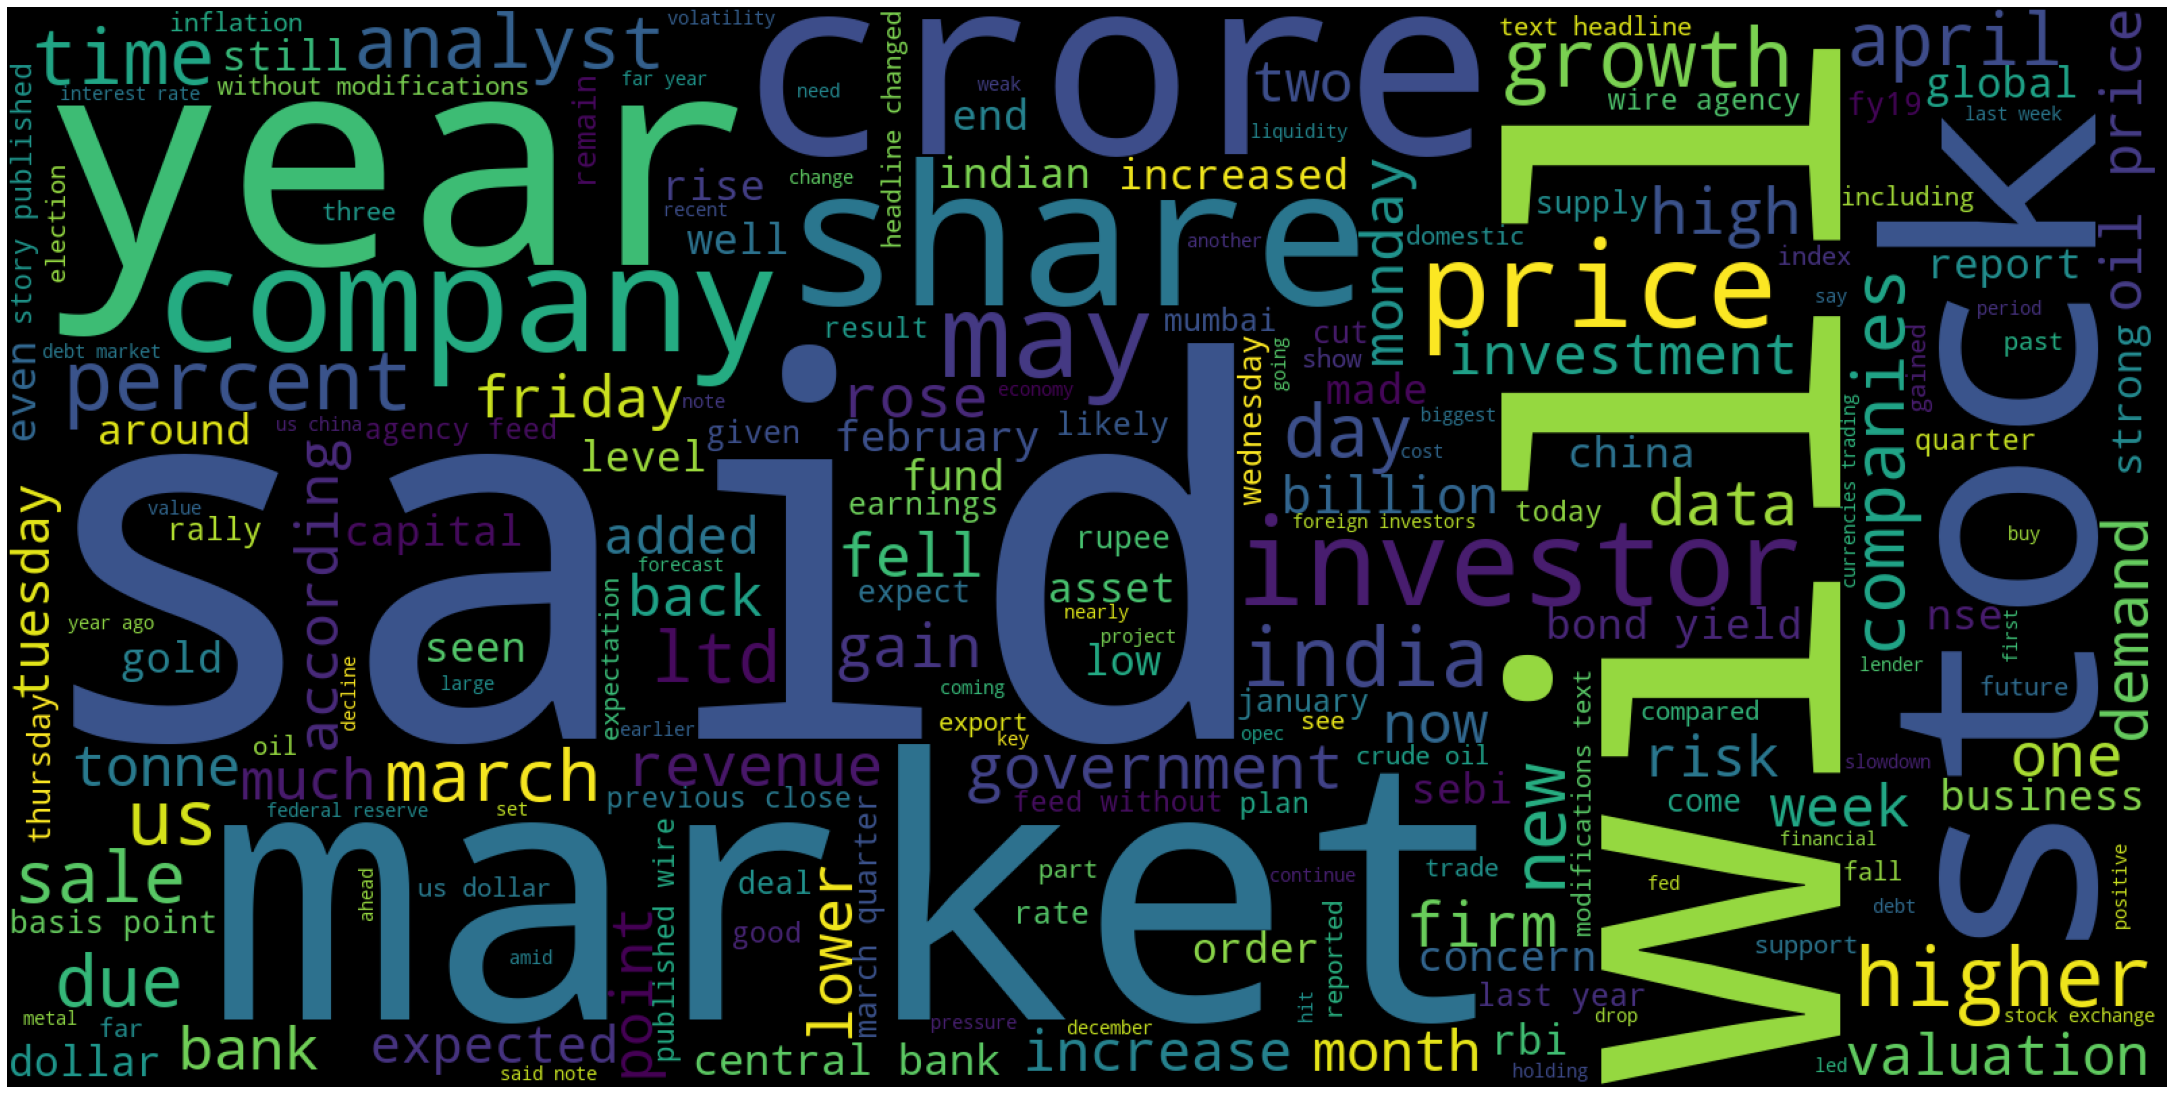

In [24]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in business_story: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

# Ploting word cloud
# Lets first convert the 'result' dictionary to 'list of tuples'
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(background_color='black',
                          width=1600,
                          height=800,
                    ).generate(comment_words)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

### Said and will are the most common words in all types of news category.

## Prepocessing text data

In [25]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


from tqdm import tqdm
preprocessed_story = []
# tqdm is for printing the status bar
for sentance in tqdm(train_data['STORY'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('nan', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.lower()
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split(" ") if e not in stopwords)
    preprocessed_story.append(sent.lower().strip())

100%|██████████| 7628/7628 [00:02<00:00, 2819.22it/s]


In [27]:
preprocessed_story[0]

'painful huge reversal fee income unheard among private sector lenders essentially means yes bank took granted fees structured loan deals paid accounted upfront books borrowers turned defaulters fees tied loan deals fell cracks gill vowed shift safer accounting practice amortizing fee income rather booking upfront gill move mend past ways means no nasty surprises future good news considering investors love clean image loathe uncertainties no gain without pain promise strong stable balance sheet comes sacrifices well investors give hopes phenomenal growth promise made kapoor'

In [28]:
train_data['STORY'] = preprocessed_story

In [29]:
y = train_data['SECTION'].values
train_data.drop(['SECTION'], axis=1, inplace=True)

print(y.shape)

(7628,)


In [31]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# **ML Models - Text (BoW)**

In [34]:
X = train_data['STORY']

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify = y_train) # this is random splitting

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(3423,) (3423,)
(1687,) (1687,)
(2518,) (2518,)


In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train.values)

X_train_bow = vectorizer.transform(X_train.values)
X_cv_bow = vectorizer.transform(X_cv.values)
X_test_bow = vectorizer.transform(X_test.values)

print("After vectorizing")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

After vectorizing
(3423, 3496) (3423,)
(1687, 3496) (1687,)
(2518, 3496) (2518,)


### Model 1. KNN with Best Hyperparameter

log_loss for k =  1 is 0.8819215440252557
log_loss for k =  3 is 0.8074754504931476
log_loss for k =  5 is 0.8000234609679103
log_loss for k =  7 is 0.7912078162306265
log_loss for k =  9 is 0.7843182610245943
log_loss for k =  11 is 0.7829258123430831
log_loss for k =  13 is 0.7843971811908425


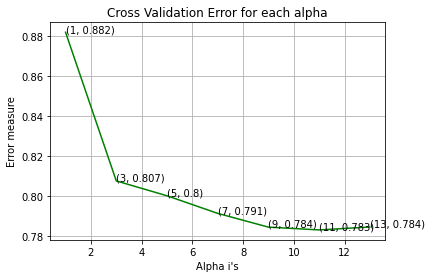

For values of best alpha =  11 The train log loss is: 0.5472408753204199
For values of best alpha =  11 The cross validation log loss is: 0.7829258123430831
For values of best alpha =  11 The test log loss is: 0.7550868957247071
Number of misclassified points  25.536139793486896
-------------------------------------------------- Confusion matrix --------------------------------------------------


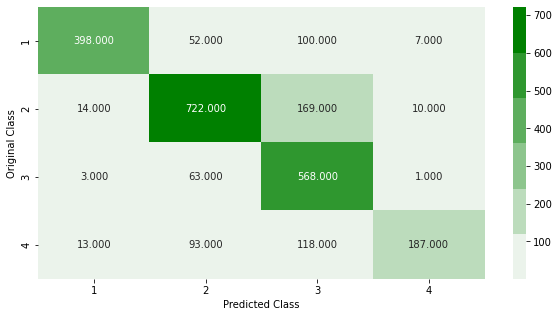

-------------------------------------------------- Precision matrix --------------------------------------------------


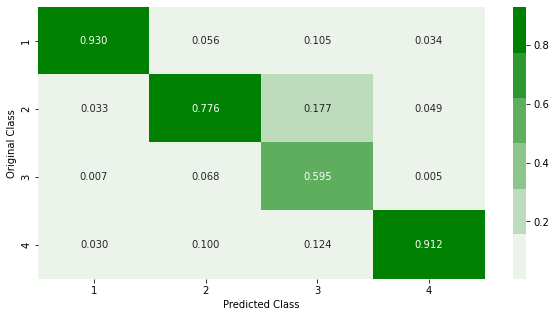

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


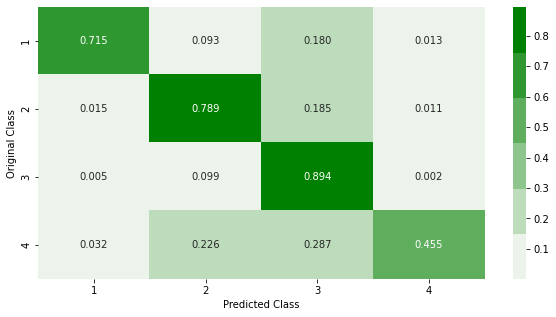

Sum of rows in precision matrix [1. 1. 1. 1.]
--------------------------------------------------
0.8752556237218814
0.7237700059276823
0.7446386020651311


In [37]:
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_bow,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_bow,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)
    
predict_y = sig_clf.predict_proba(X_train_bow)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_bow))
print("-"*50)
print(sig_clf.score(X_train_bow, y_train))
print(sig_clf.score(X_cv_bow, y_cv))
print(sig_clf.score(X_test_bow, y_test))

### Model2. Logistic Regression

log_loss for c =  1e-05 is 0.33873067108765903
log_loss for c =  0.0001 is 0.325982589021702
log_loss for c =  0.001 is 0.27993983148603124
log_loss for c =  0.01 is 0.22990015540438263
log_loss for c =  0.1 is 0.21932510556547316
log_loss for c =  1 is 0.21687964583677596
log_loss for c =  10 is 0.22258818719251455
log_loss for c =  100 is 0.22476382085290206
log_loss for c =  1000 is 0.23106807993155515


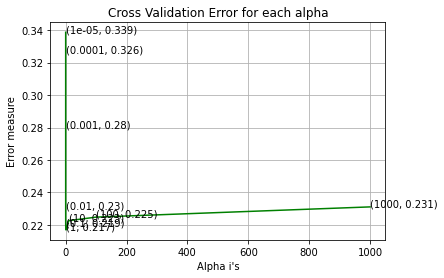

log loss for train data 0.12104223606752458
log loss for cv data 0.21687964583677596
log loss for test data 0.20606530278667184
Number of misclassified points  5.599682287529785
-------------------------------------------------- Confusion matrix --------------------------------------------------


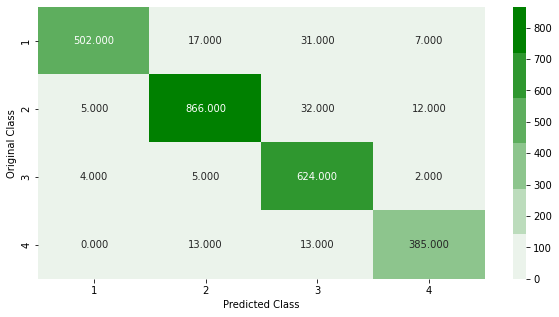

-------------------------------------------------- Precision matrix --------------------------------------------------


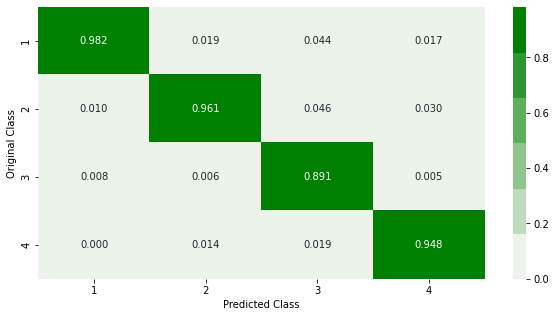

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


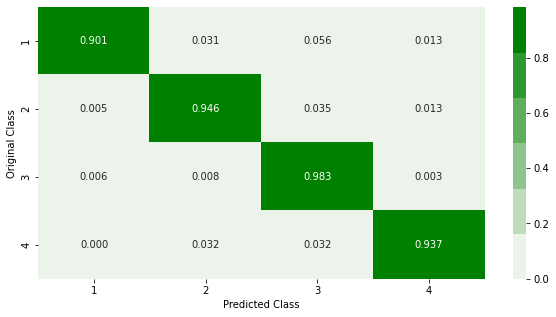

Sum of rows in precision matrix [1. 1. 1. 1.]
0.9962021618463336
0.943687018375815
0.9440031771247022


In [38]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_bow,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_bow,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)
pred_y=sig_clf.predict(X_test_bow)

predict_y = sig_clf.predict_proba(X_train_bow)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_bow)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_bow)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_bow))

print(sig_clf.score(X_train_bow, y_train))
print(sig_clf.score(X_cv_bow, y_cv))
print(sig_clf.score(X_test_bow, y_test))

### Model 3 . RandomForest Classifier

log_loss for c =  10 is 0.2569856832902902
log_loss for c =  50 is 0.22101883204151065
log_loss for c =  100 is 0.21437832891700692
log_loss for c =  500 is 0.20991640543059495
log_loss for c =  1000 is 0.20880118698598016
log_loss for c =  2000 is 0.20885665476365467
log_loss for c =  3000 is 0.20941871796572858


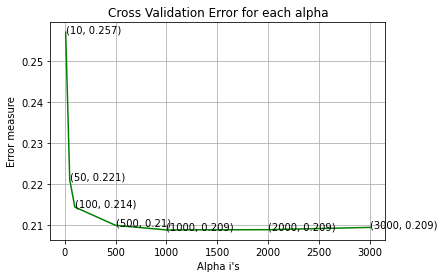

For values of best alpha =  1000 The train log loss is: 0.04694663684384139
For values of best alpha =  1000 The cross validation log loss is: 0.20880118698598016
For values of best alpha =  1000 The test log loss is: 0.17831164473325267
Number of misclassified points  5.083399523431295
-------------------------------------------------- Confusion matrix --------------------------------------------------


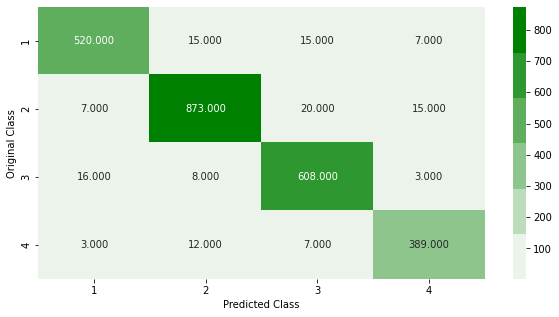

-------------------------------------------------- Precision matrix --------------------------------------------------


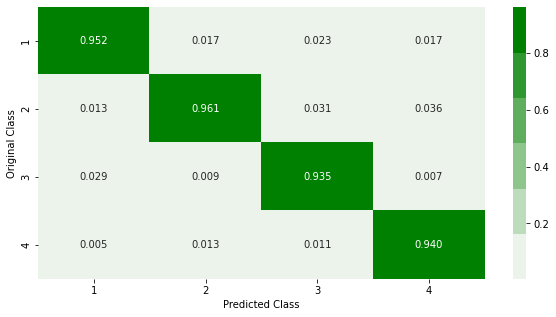

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


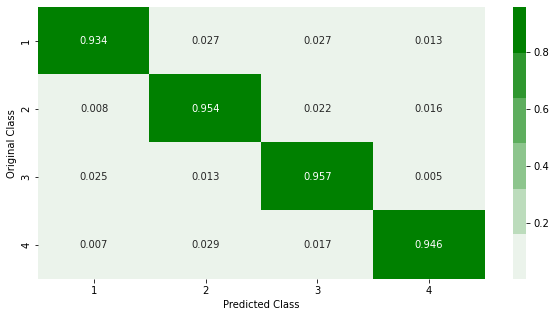

Sum of rows in precision matrix [1. 1. 1. 1.]
0.997662868828513
0.9365737996443391
0.949166004765687


In [39]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_bow,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_bow,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

predict_y = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_bow))

print(sig_clf.score(X_train_bow, y_train))
print(sig_clf.score(X_cv_bow, y_cv))
print(sig_clf.score(X_test_bow, y_test))

### Model 4: XgBoost Classifier

log_loss for c =  10 is 0.5248466168348476
log_loss for c =  50 is 0.3379691105497302
log_loss for c =  100 is 0.2772758510740304
log_loss for c =  500 is 0.2211154652667186
log_loss for c =  1000 is 0.2303107281898076
log_loss for c =  2000 is 0.2462598005059855


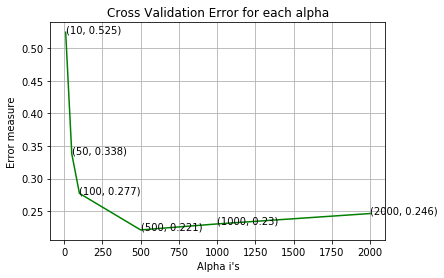

For values of best alpha =  500 The train log loss is: 0.0862312060727253
For values of best alpha =  500 The cross validation log loss is: 0.2211154652667186
For values of best alpha =  500 The test log loss is: 0.1933030856508722
Number of misclassified points  5.798252581413821
-------------------------------------------------- Confusion matrix --------------------------------------------------


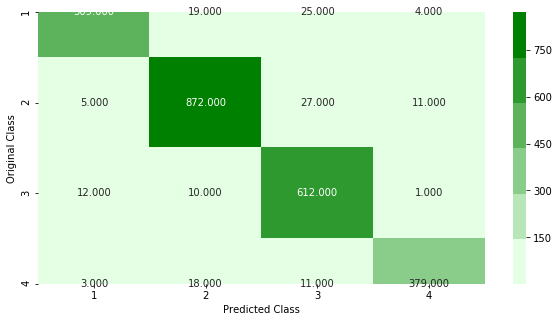

-------------------------------------------------- Precision matrix --------------------------------------------------


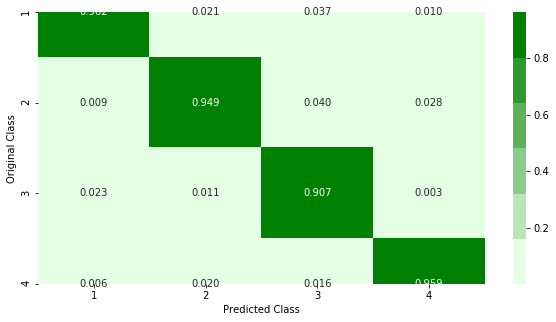

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


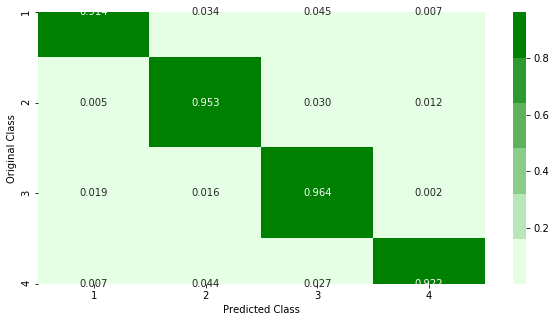

Sum of rows in precision matrix [1. 1. 1. 1.]
0.9938650306748467
0.9312388855957321
0.9420174741858618


In [ ]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_bow,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_bow,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)
    
predict_y = sig_clf.predict_proba(X_train_bow)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_bow)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test_bow))

print(sig_clf.score(X_train_bow, y_train))
print(sig_clf.score(X_cv_bow, y_cv))
print(sig_clf.score(X_test_bow, y_test))

In [41]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = (["Model", "Train Acc. Score","Cv Acc. Score", "Test Acc. Score","Missclassified points"])

x.add_row(["KNN",87,74,75,25.53])
x.add_row(["Logistic regression",99,94,94,5.59])
x.add_row(["Random Forest",99,93,94, 5.08])
x.add_row(["XGBoost",99,93,94,5.79])

print(x)

+---------------------+------------------+---------------+-----------------+-----------------------+
|        Model        | Train Acc. Score | Cv Acc. Score | Test Acc. Score | Missclassified points |
+---------------------+------------------+---------------+-----------------+-----------------------+
|         KNN         |        87        |       74      |        75       |         25.53         |
| Logistic regression |        99        |       94      |        94       |          5.59         |
|    Random Forest    |        99        |       93      |        94       |          5.08         |
|       XGBoost       |        99        |       93      |        94       |          5.79         |
+---------------------+------------------+---------------+-----------------+-----------------------+


# **ML Models - Text (tfidf_w2v)**

In [ ]:
import numpy as np

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


words = []

for i in train_data['STORY']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
    
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

0it [00:00, ?it/s]

Loading Glove Model


1917495it [03:21, 9493.25it/s]


Done. 1917495  words loaded!
all the words in the coupus 508642
the unique words in the coupus 32675
The number of words that are present in both glove vectors and our coupus 29524 ( 90.357 %)
word 2 vec length 29524


In [ ]:
train_story = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_story.append(vector)

print(len(train_story))
print(len(train_story[0]))


cv_story = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_story.append(vector)

print(len(cv_story))
print(len(cv_story[0]))


test_story = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_story.append(vector)

print(len(test_story))
print(len(test_story[0]))

 50%|██████████████████████████████████████▏                                      | 836/1687 [00:00<00:00, 8299.24it/s]

3423
300


 29%|██████████████████████▍                                                      | 733/2518 [00:00<00:00, 7276.92it/s]

1687
300


100%|████████████████████████████████████████████████████████████████████████████| 2518/2518 [00:00<00:00, 7559.12it/s]

2518
300


### KNeighboursClassifiers

log_loss for k =  1 is 0.2324299667173608
log_loss for k =  3 is 0.16830391777023423
log_loss for k =  5 is 0.1596902620404765
log_loss for k =  7 is 0.1592238523604686
log_loss for k =  9 is 0.16054936073143633
log_loss for k =  11 is 0.15961995075679308
log_loss for k =  13 is 0.158881261330275


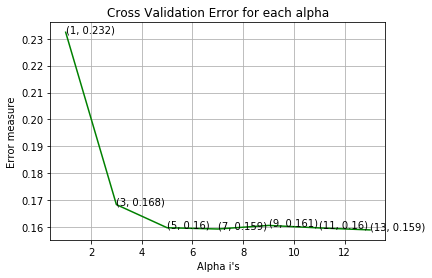

For values of best alpha =  13 The train log loss is: 0.14739246420952204
For values of best alpha =  13 The cross validation log loss is: 0.158881261330275
For values of best alpha =  13 The test log loss is: 0.16880338260458372
Number of misclassified points  4.646544876886418
-------------------------------------------------- Confusion matrix --------------------------------------------------


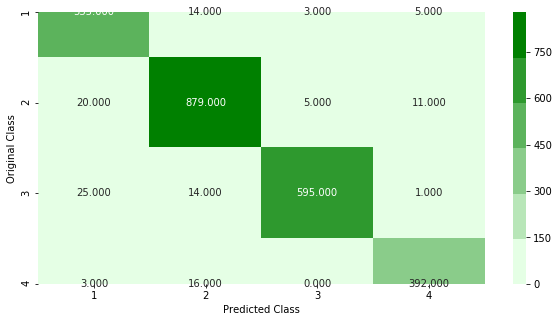

-------------------------------------------------- Precision matrix --------------------------------------------------


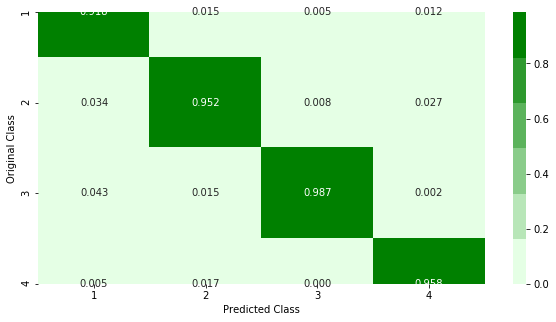

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


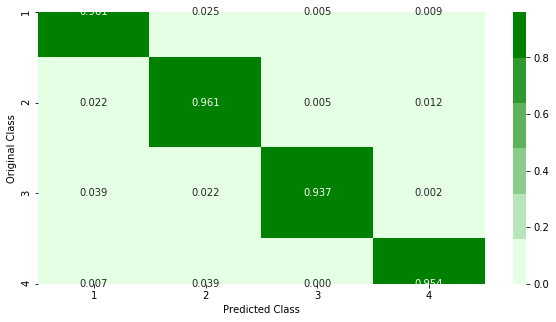

Sum of rows in precision matrix [1. 1. 1. 1.]
--------------------------------------------------
0.9529652351738241
0.9531713100177831
0.9535345512311358


In [ ]:
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(train_story,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(train_story, y_train)
    predict_y = sig_clf.predict_proba(cv_story)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(train_story,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(train_story, y_train)
    
predict_y = sig_clf.predict_proba(train_story)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(cv_story)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_story)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_story))
print("-"*50)
print(sig_clf.score(train_story, y_train))
print(sig_clf.score(cv_story, y_cv))
print(sig_clf.score(test_story, y_test))

log_loss for c =  1e-05 is 1.14979961741762
log_loss for c =  0.0001 is 0.9640788005729238
log_loss for c =  0.001 is 0.3048669630509168
log_loss for c =  0.01 is 0.19735699874349388
log_loss for c =  0.1 is 0.14874468172247327
log_loss for c =  1 is 0.12306084959721311
log_loss for c =  10 is 0.12574275866860224
log_loss for c =  100 is 0.14564438168260985
log_loss for c =  1000 is 0.15736129418821207


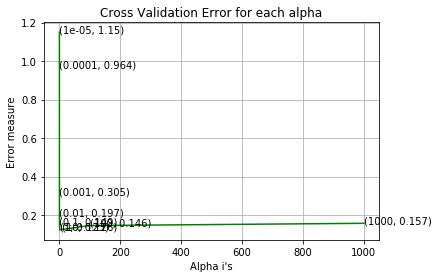

log loss for train data 0.10720815562097699
log loss for cv data 0.12306084959721311
log loss for test data 0.13790612014209952
Number of misclassified points  4.209690230341541
-------------------------------------------------- Confusion matrix --------------------------------------------------


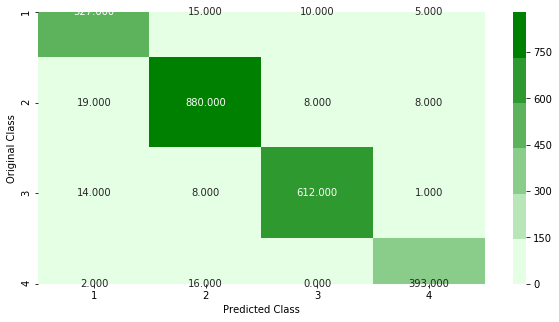

-------------------------------------------------- Precision matrix --------------------------------------------------


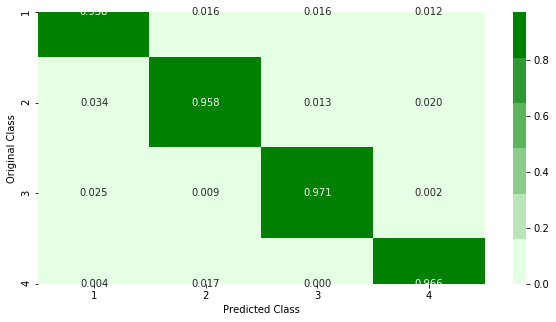

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


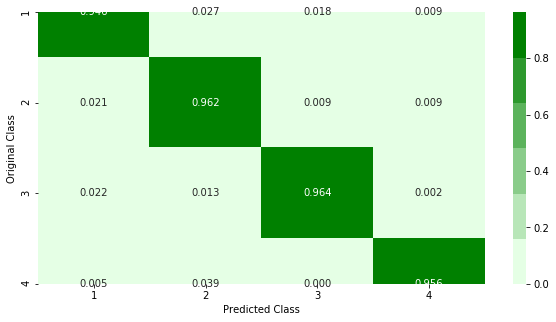

Sum of rows in precision matrix [1. 1. 1. 1.]
0.9684487291849255
0.965026674570243
0.9579030976965845


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(train_story,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(train_story, y_train)
    predict_y = sig_clf.predict_proba(cv_story)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(train_story,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(train_story, y_train)
pred_y=sig_clf.predict(test_story)

predict_y = sig_clf.predict_proba(train_story)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_story)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_story)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(test_story))

print(sig_clf.score(train_story, y_train))
print(sig_clf.score(cv_story, y_cv))
print(sig_clf.score(test_story, y_test))

log_loss for c =  10 is 0.20279102259957366
log_loss for c =  50 is 0.15949354808801117
log_loss for c =  100 is 0.1538643916015036
log_loss for c =  500 is 0.15139344019685397
log_loss for c =  1000 is 0.15202926116943322
log_loss for c =  2000 is 0.15240885950936323
log_loss for c =  3000 is 0.15267273377459364


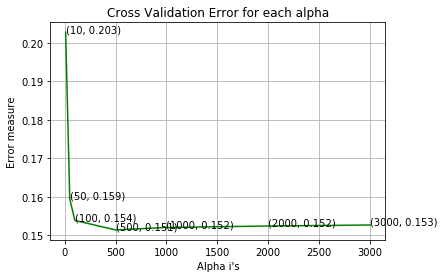

For values of best alpha =  500 The train log loss is: 0.05221049524663018
For values of best alpha =  500 The cross validation log loss is: 0.151393440196854
For values of best alpha =  500 The test log loss is: 0.16767596299918913
Number of misclassified points  5.162827640984909
-------------------------------------------------- Confusion matrix --------------------------------------------------


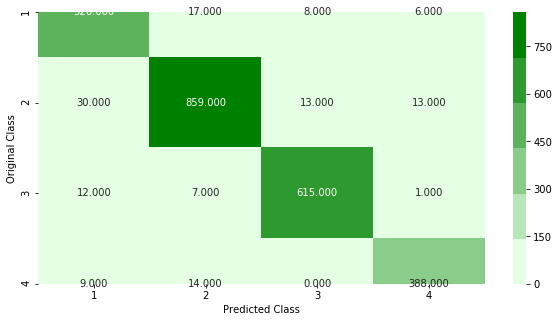

-------------------------------------------------- Precision matrix --------------------------------------------------


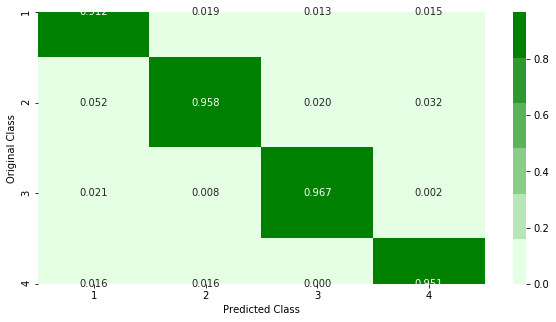

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


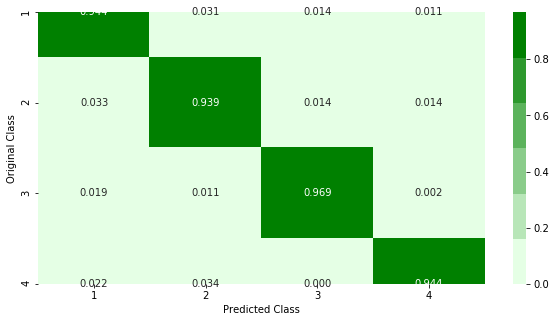

Sum of rows in precision matrix [1. 1. 1. 1.]
0.9967864446392054
0.950207468879668
0.9483717235901509


In [ ]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(train_story,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(train_story, y_train)
    predict_y = sig_clf.predict_proba(cv_story)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(train_story,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(train_story, y_train)

predict_y = sig_clf.predict_proba(train_story)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(cv_story)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_story)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_story))

print(sig_clf.score(train_story, y_train))
print(sig_clf.score(cv_story, y_cv))
print(sig_clf.score(test_story, y_test))

In [ ]:
train_story = pd.DataFrame(train_story)
cv_story = pd.DataFrame(cv_story)
test_story = pd.DataFrame(test_story)

log_loss for c =  10 is 0.270572379505229
log_loss for c =  50 is 0.18316104324709634
log_loss for c =  100 is 0.16347525050327052
log_loss for c =  500 is 0.15591380265406735
log_loss for c =  1000 is 0.15376274119266395
log_loss for c =  2000 is 0.15265301396460965


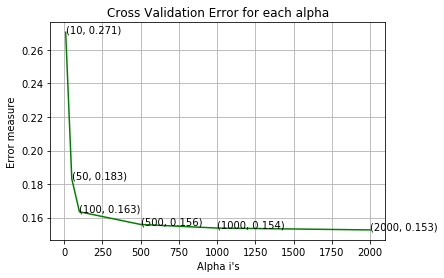

For values of best alpha =  2000 The train log loss is: 0.056359741841068685
For values of best alpha =  2000 The cross validation log loss is: 0.15265301396460965
For values of best alpha =  2000 The test log loss is: 0.15899286050656347
Number of misclassified points  4.130262112787927
-------------------------------------------------- Confusion matrix --------------------------------------------------


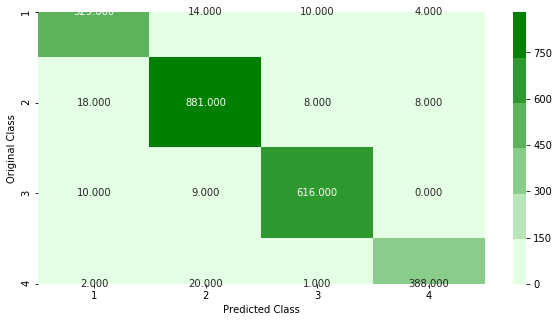

-------------------------------------------------- Precision matrix --------------------------------------------------


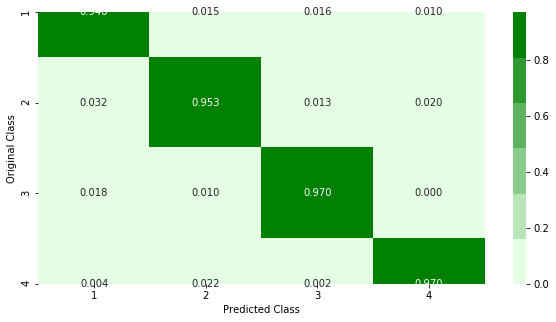

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


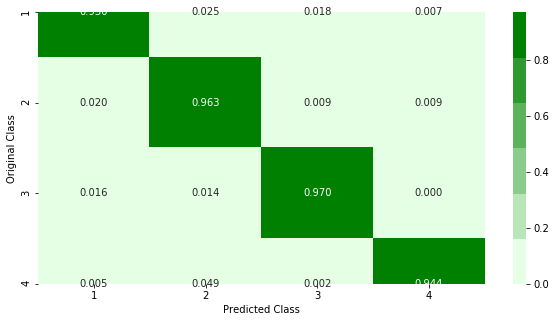

Sum of rows in precision matrix [1. 1. 1. 1.]
0.9970785860356413
0.9626556016597511
0.9586973788721207


In [ ]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(train_story,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_story, y_train)
    predict_y = sig_clf.predict_proba(cv_story)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(train_story,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_story, y_train)
    
predict_y = sig_clf.predict_proba(train_story)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(cv_story)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_story)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_story))

print(sig_clf.score(train_story, y_train))
print(sig_clf.score(cv_story, y_cv))
print(sig_clf.score(test_story, y_test))

In [42]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = (["Model", "Train Acc. Score","Cv Acc. Score", "Test Acc. Score","Missclassified points"])

x.add_row(["KNN",95,95,95,4.64])
x.add_row(["Logistic regression",96,96,95.7,4.20])
x.add_row(["Random Forest",99,95,94, 5.14])
x.add_row(["XGBoost",99,96,96,4.13])

print(x)

+---------------------+------------------+---------------+-----------------+-----------------------+
|        Model        | Train Acc. Score | Cv Acc. Score | Test Acc. Score | Missclassified points |
+---------------------+------------------+---------------+-----------------+-----------------------+
|         KNN         |        95        |       95      |        95       |          4.64         |
| Logistic regression |        96        |       96      |       95.7      |          4.2          |
|    Random Forest    |        99        |       95      |        94       |          5.14         |
|       XGBoost       |        99        |       96      |        96       |          4.13         |
+---------------------+------------------+---------------+-----------------+-----------------------+
